In [ ]:
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

## Comparison of AutoML Frameworks

### Introduction

#### Why AutoML?
https://www.infoworld.com/article/3430788/automated-machine-learning-or-automl-explained.html

It aims to reduce or eliminate the need for skilled data scientists to build machine learning and deep learning models. Instead, an AutoML system allows you to provide the labeled training data as input and receive an optimized model as output.

There are several ways of going about this. 
1. Simply train every kind of model on the data and pick the one that works best.
2. Optimize the hyperparameters of the best model or models to train an even better model.

### Gartner Data Science and Machine Learning Platforms (2018, 2019)
https://b2bsalescafe.files.wordpress.com/2019/09/gartner-magic-quadrant-for-data-science-and-machine-learning-platforms-january-2019.pdf
https://b2bsalescafe.files.wordpress.com/2020/04/gartner-magic-quadrant-for-data-science-and-machine-learning-platforms-feb-2020.pdf

1. It assesses the availability of some pre-packaged content but does not assess service providers that can help jump-start or extend DSML projects throughout an organization and does not assess specialized vendors of industry-, or function-specific solutions.
<br>
2. There are 16 vendors of DSML, all are measured based on specific weighting criteria before pointed into the magic quadrant.
<br>
3. The magic quadrant consist of four (4) quadrants; Challengers, Leaders, Niche Players and Visionaries. These quadrants have their own specific criteria and characteristics.
<br>
4. Comparison are done between Gartner Magic Quadrant 2019 and 2018 to see the movement of DSML platforms across quadrant. This aims is to see the performance of vendors over different assessments in the market.
<br>
5. Here are platforms discarded from the magic quadrant due to unable to reached specific standards set by Gartner. However, there are also new plaforms introduced in Gartner Magic Quadrant 2019.


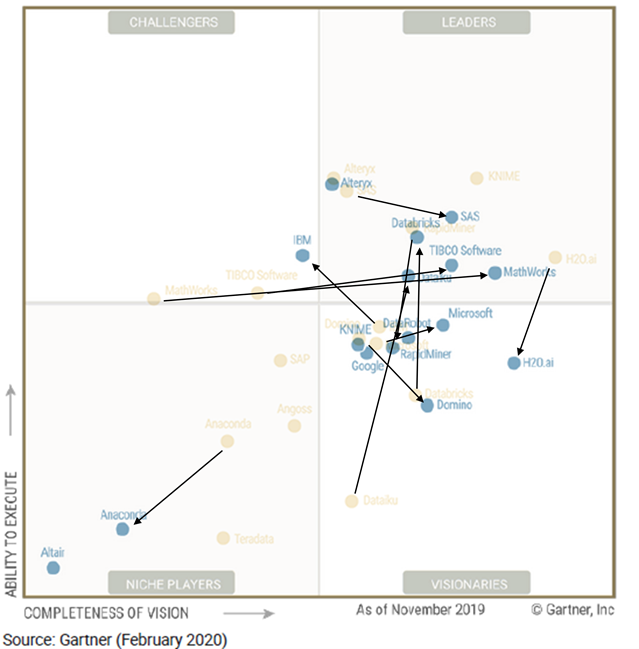

### AutoML Table of Comparison
https://arxiv.org/pdf/1908.05557.pdf
<br>
https://arxiv.org/abs/1808.06492

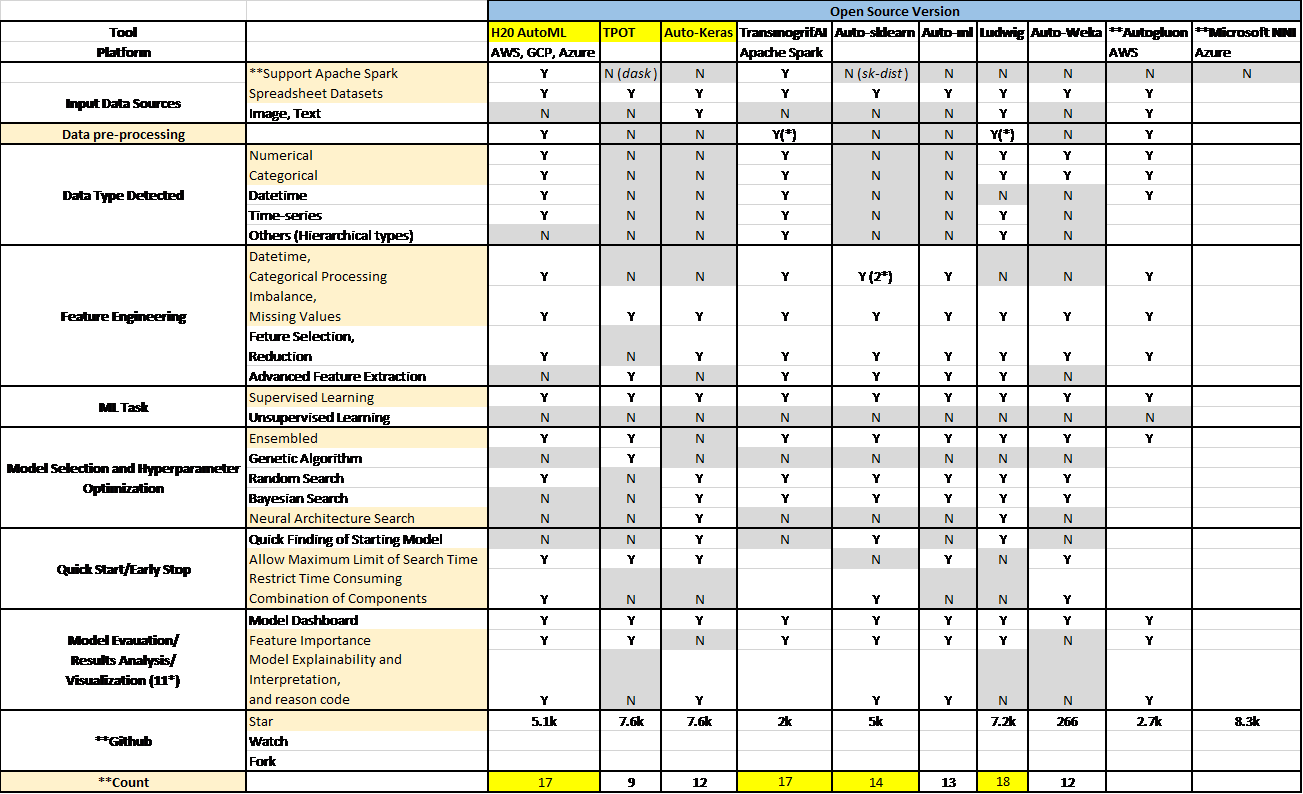

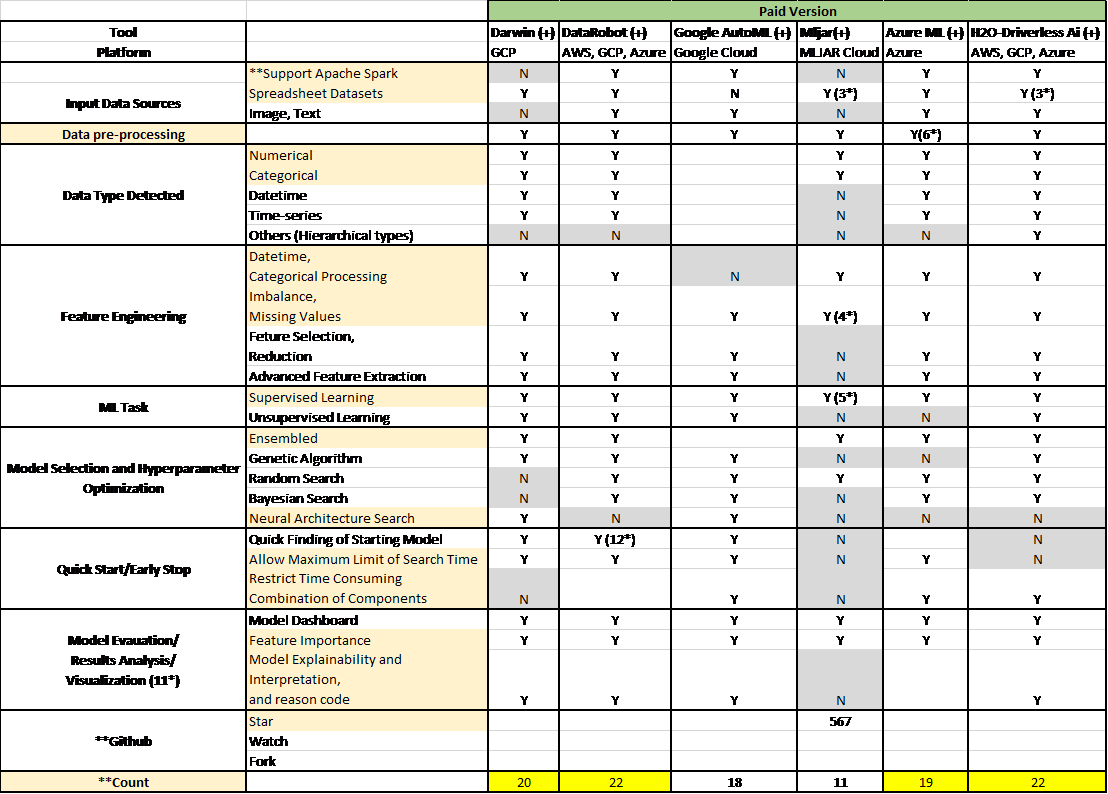

#### Thus, ranking is done from best to worst based on the comparison above, considering priority given to support Spark, most features available and AutoMLs version.
1. H2O-Driverless AI (support Spark, 22, paid)
2. DataRobot (support Spark, 22, paid)
3. Azure ML (support Spark, 19, paid)
4. H2O AutoML, TransmogrifAI (support Spark, 17, open source)
5. Darwin (20, paid)
6. Ludwig (18, open source)
7. Auto-sklearn (14, open source)

#### There are some of the criteria considered as more important than the rest.
1. Input Data Source (Spreadsheet dataset)
2. Data type detected (Numerical, Categorical)
3. Feature Engineering (Datetime, categorical processing, Imbalance, missing value)
4. ML task (Supervised learning)
5. Model selection and hyperparameter optimization (Ensembled, Neural architecture search)
6. Quick start/early stop (Allow maximum limit of search time, Restrict time consuming combination of components)
7. Model evaluation/result analysis/visualization (Feature importance, model explain ability and interpretation, and reason code)
8. Github (Star)


#### Thus, ranking is done from best to worst based on the comparison above, considering priority given to support Spark, most features available and AutoMLs version. 
1. H2O AutoML (support Spark, 14, open source)
2. DataRobot, H20-Driverless AI, Azure ML (support Spark, 12, paid)
3. TransmogrifAI (support Spark, 10, open source)
4. Google AutoML (support Spark, 9, paid)
5. Darwin (12, paid)
6. Autogluon (10, open source)
7. Ludwig (9, open source)
8. MLJar (9, paid)

### H2O AutoML 
https://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html

In [ ]:
import h2o
from h2o.automl import H2OAutoML

h2o.init()

# Import a sample binary outcome train/test set into H2O
train = h2o.import_file("https://s3.amazonaws.com/erin-data/higgs/higgs_train_10k.csv")
test = h2o.import_file("https://s3.amazonaws.com/erin-data/higgs/higgs_test_5k.csv")

# Identify predictors and response
x = train.columns
y = "response"
x.remove(y)

# For binary classification, response should be a factor
train[y] = train[y].asfactor()
test[y] = test[y].asfactor()

# Run AutoML for 20 base models (limited to 1 hour max runtime by default)
aml = H2OAutoML(max_models=20, seed=1)
aml.train(x=x, y=y, training_frame=train)

# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

### AutoKeras
https://autokeras.com/tutorial/structured_data_classification/

In [ ]:
import tensorflow as tf
import autokeras as ak

TRAIN_DATA_URL = "https://storage.googleapis.com/tf-datasets/titanic/train.csv"
TEST_DATA_URL = "https://storage.googleapis.com/tf-datasets/titanic/eval.csv"

train_file_path = tf.keras.utils.get_file("train.csv", TRAIN_DATA_URL)
test_file_path = tf.keras.utils.get_file("eval.csv", TEST_DATA_URL)

# Initialize the structured data classifier.
clf = ak.StructuredDataClassifier(
    overwrite=True,
    max_trials=3) # It tries 3 different models.
# Feed the structured data classifier with training data.
clf.fit(
    # The path to the train.csv file.
    train_file_path,
    # The name of the label column.
    'survived',
    epochs=10)
# Predict with the best model.
predicted_y = clf.predict(test_file_path)
# Evaluate the best model with testing data.
print(clf.evaluate(test_file_path, 'survived'))

### TPOT
http://epistasislab.github.io/tpot/

In [ ]:
from tpot import TPOTClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data.astype(np.float64),
    iris.target.astype(np.float64), train_size=0.75, test_size=0.25, random_state=42)

tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
#tpot.export('tpot_iris_pipeline.py')

### Application

#### 1. Data Analysis

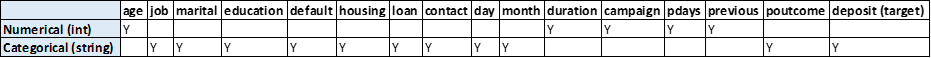
<br>
1. Portuguese Bank Dataset https://archive.ics.uci.edu/ml/datasets/bank+marketing#
2. The classification goal is to predict if the client will subscribe (yes/no) a term deposit.
3. The dataset is retrieved from Kaggle repositories. It consists of multipleclass attributes with 41188 observations.
4. The dataset is split with the ratio of best practice, 70:30. However, the split ratio can be manipulated according to own preference if the end result is not satisfied.

Data Preprocessing in Apache Spark
<br>
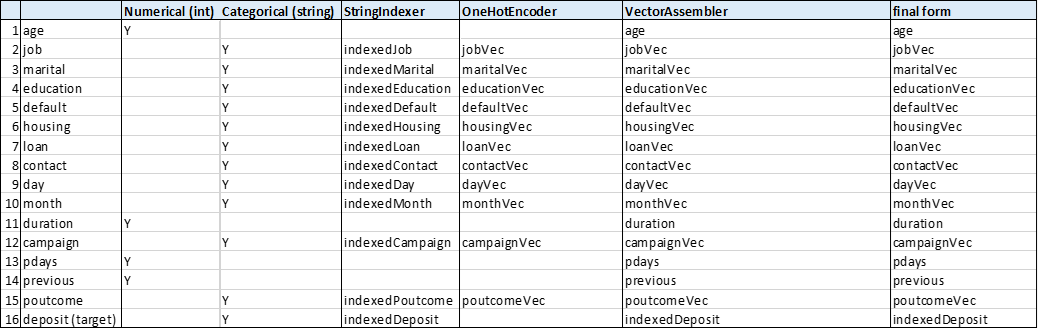

1. pipeline_prepV6_DECISION_TREE.ipynb
2. pipeline_prepV6_GRADIENT_BOOSTED.ipynb
3. pipeline_prepV6_RANDOM_FOREST.ipynb
4. duplicate_LGB.ipynb

Data Preprocessing in Scikit Learn
<br>
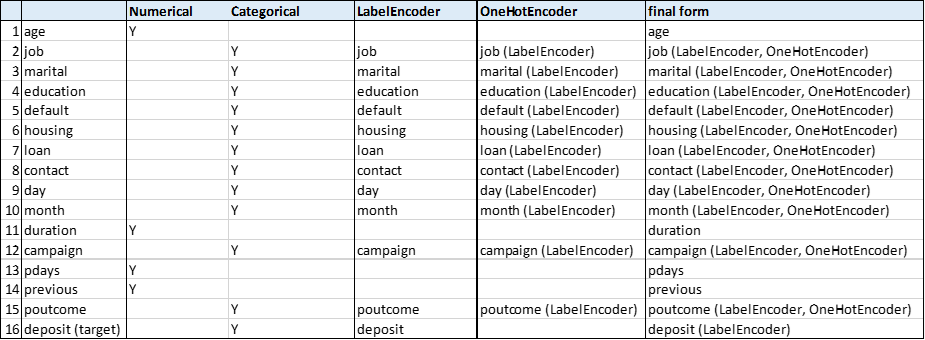

1. duplicate_LGB_v2.ipynb
2. duplicate_TPOT.ipynb
3. duplicate_autoKeras.ipynb
4. duplicate_autoKeras_v2.ipynb

Data Preprocessing in H2O-ai
<br>
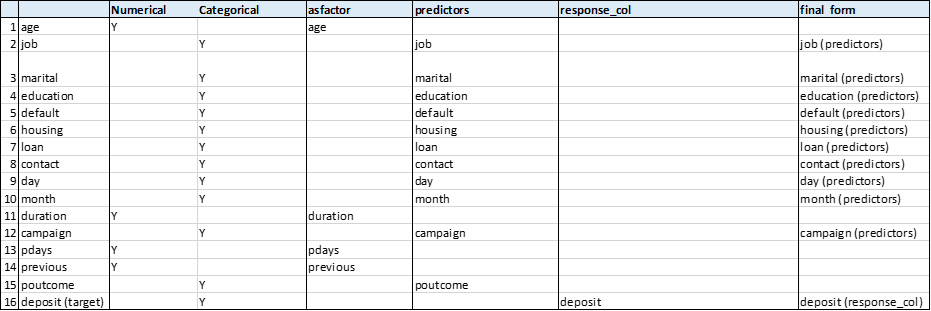

1. duplicate_H2O_v2_H2OGeneralizedLinearEstimator.ipynb

#### 2. Benchmark Testing

note: some of the missing values of error metrics are due to the unavailability provided by the AutoML framework respectively.

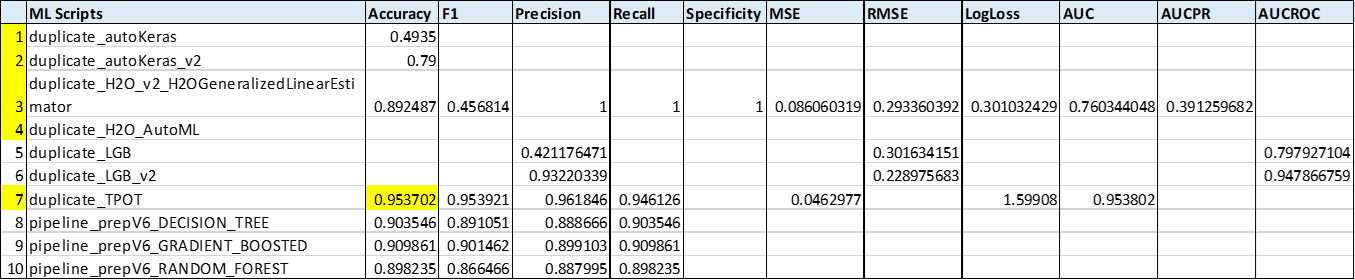

### Model Explainability

#### 1. LIME (Local Interpretable Model-Agnostic Explanations)
https://arxiv.org/abs/1602.04938

Lime can be used to get more insights into model prediction like explaining why models take a particular decision for an individual observation. It can also be quite useful while selecting between different models. The central idea behind Lime is that it explains locally in the vicinity of the instance being explained by perturbating the different features rather than producing explanations at the entire model level. 

It does so by fitting a sparse model on the locally dispersed, noise-induced dataset. This helps convert a non-linear problem into a linear one. The indicator variables with the largest coefficients in the model are then returned as the drivers of the score.

#### 2. SHAP (Shapley Additive Explanations)

It tells on how it got the score for an instance in an additive manner. SHAP has not only a generic explainer that works for any model but also a TreeExplainer for tree-based models. It theoretically guarantees consistency and is slower than Lime. 

Additionally, the computational requirements of exploring all possible feature combinations grow exponentially in SHAP.

### Conclusion

Based on the result table, Auto-Keras perform the worst compared to H2OGeneralizedLinearEstimator, LGB, LGB_v2, TPOT, and MMLSPark (Decision Tree, Gradient Boosted and Random Forest) with accuracy of 0.49. However, modified automl, Auto-Keras_v2 shows a better performance with accuracy of 0.79.

H2OGeneralizedLinearEstimator yields accuracy of 0.89, outperforms Auto-Keras and Auto-Keras_v2. It also provides other error metrics values as well such as F1, Precision, Recall, Specificity, MSE, RMSE, Logloss, AUC and AUCPR. The automl configuration is very simple. It also provides model explainability for further model diagnose. H2O automl experiment cannot be done due to the limited resources. Both H2O-ai and H2O automl provide leaderboard of models run during execution.

Both LGB and LGB_v2 does not provides accuracy values. But, according to their precision values, LGB_v2 performs better compared to LGB with value of 0.93. This value, however, cannot be used directly to compare with other models or automls.

TPOT yields the best performance among other automl with accuracy of 0.95 without any modification. TPOT provides option to export best-configured pipeline to (.py) format, similar to Auto-Keras. However, TPOT is limited in features availability and error metrics, thus it is not the best option to be implemented in the future.

MMLSPark (Decision Tree, Gradient Boosted and Random Forest) are used as the benchmark models for this experiment. Decision Tree, Gradient Boosted and Random Forest yield accuracy of 0.90, 0.91, 0.89 respectively. These accuracy values, however, are tuned several times (it costs time) to get the desired, on-par with automls default configuration.

